# Customer Churn Prediction of First Time Buyers in B2B-Commerce

## Table of Contents

1. Introducton and objective of the term paper <br/>
2. Theoretical foundation of "Customer Churn in B2B-Commerce"
3. Development of the Machine Learning Model <br/>
    3.1 Data Preprocessing <br/>
    3.2 Data Analysis <br/>
    3.3 Modeling <br/>
    3.4 Evaluation <br/>
4. Results and Conclusion
5. References

## 1. Introducton and objective of the term paper

The ability to profitably acquire and subsequently retain new customers is a key success criterion for any profit-oriented company. <br/>

In order to ensure a strategically correct orientation of the company, the "customer churn rate" has established itself in practice as a widely used key figure. It describes the churn rate and thus the number of people who leave the customer base over a certain period of time (Sharma / Panigrahi, 2011, p. 26). In the case of the company under investigation, Laserhub GmbH, this rate is unfortunately 39% for first-time buyers (FTBs), which means that almost half of the customers acquired churn again. 
Consequently, management has a vested interest in identifying the drivers of customer churn and taking appropriate countermeasures. <br/>

In the past, when decision-makers realized that customer churn rates were too high and sustainable business growth was at risk, they were often forced to take broad-based sales and marketing measures because individual customers who were willing to churn could not be identified. <br/>
Recently, however, the machine learning method of predicting customer churn has emerged as a more effective alternative, as it can be used to determine the likelihood of individual customers churning. This means that customer churn can not only be countered much more capital-efficiently than with conventional methods, but also more proactively. In addition to prediction, depending on the machine learning method, valuable insights into the drivers of customer churn are also gained (Jahromi et al., 2014, p. 1258). 

The goal of this work is therefore to develop a customer churn prediction model that enables Laserhub GmbH to realize the benefits described above and thus enable sustainable business growth.

## 2. Theoretical foundations of "Customer Churn of First Time Buyers in B2B-Commerce"

Customer churn predictions are usually done in a Business-to-Consumer (B2C) context, such as telecommunications and banking, where customers that are at risk of terminating their contract are targeted and hence, a clear "Churn" event is present (Reichheld, 2001, p. 1). In the transactional Business-to-Business (B2B) context, determining if someone is churned is more complicated as there is no clear ending of business relation. More recent literature hence often considers customers as churned if they didn't engage in a transaction in a certain time that is relevant for the business being examined, which is the approach this paper follows (Buckinx / Van der Poel, 2005, p. 252). <br/>
Following this practice, we consider a company to have churned if no repeat order has been placed within 90 days, as this exceeds the average repurchase cycle of 30 days for Laserhub customers by a factor of three.

As the working title suggests, the analysis is further simplified in terms of churn timing. 
Although customers can of course end the business relationship after any number of orders, this work focuses on the churn of first-time buyers.  
The practical background is that Laserhub records the highest churn rate here and hopes to gain insights for suitable acquisition measures from this.
For the model, this results in a significant simplification, since the explanatory variables, which were themselves partly influenced by the duration of the business relationship, are now all examined in relation to their first order (e.g., it can be assumed that a complaint at the beginning of the business relationship has a stronger influence than after several successful orders). 

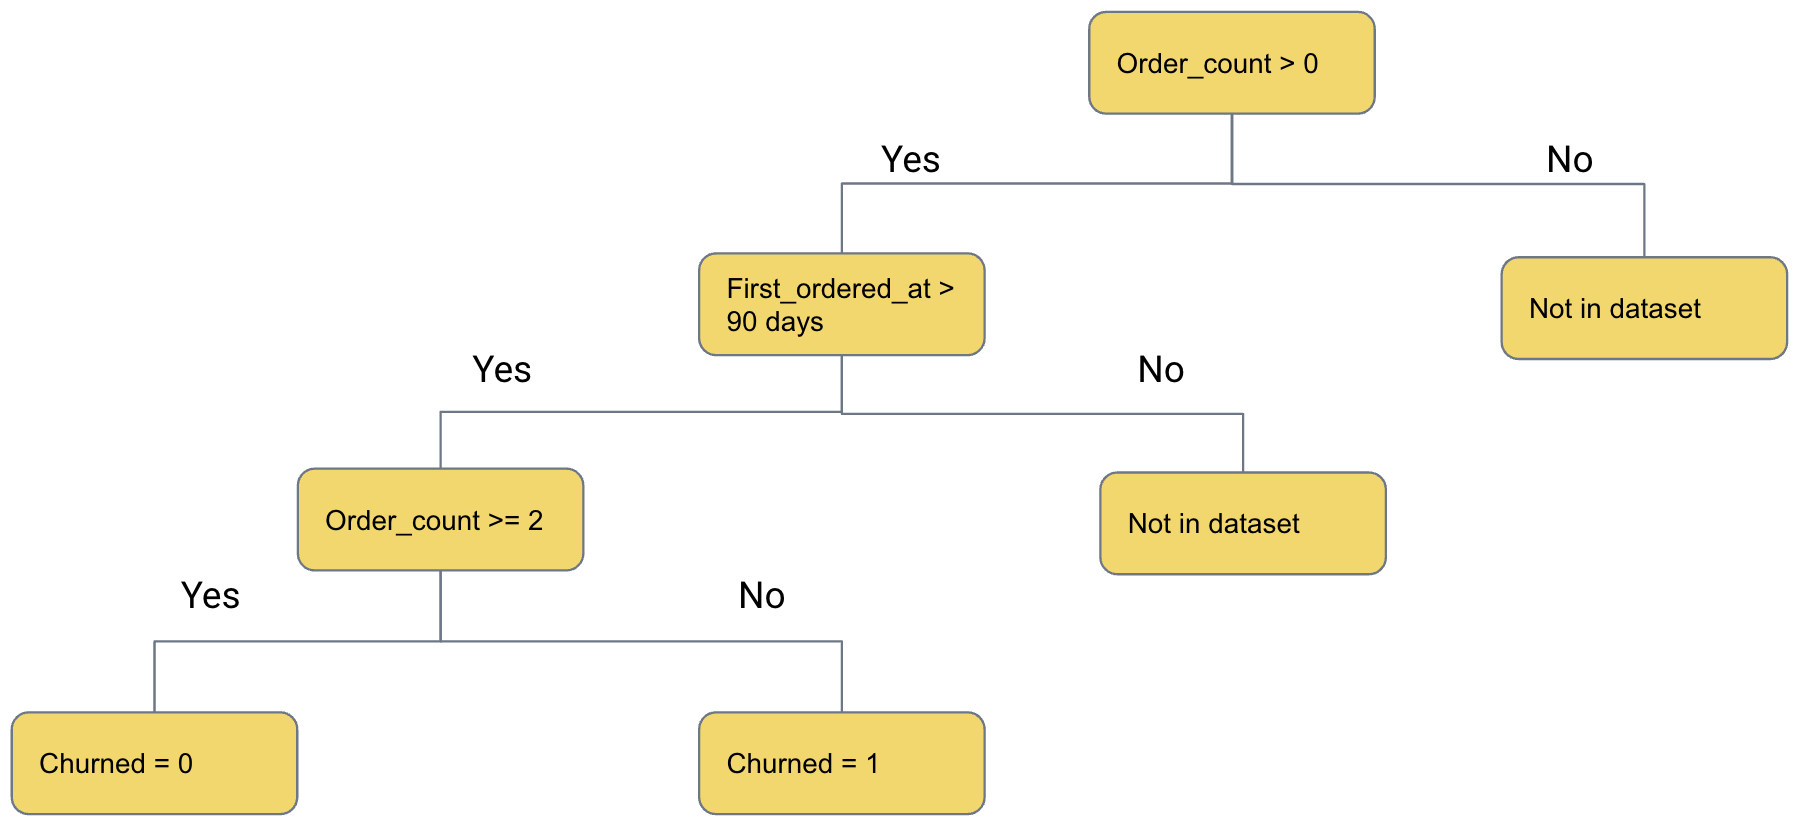

## 3. Development of the Machine Learning Model

In the following, we'll be examinen the realtionship between the dependent variable "Churned" and the dataset at hand. To do this, the following steps will be covered:

3.1 Data Preprocessing <br/>
3.2 Data Exploration and Feature Engineering<br/>
3.3 Modeling <br/>
3.4 Evaluation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns


from IPython import display
from base64 import b64decode

dataset1 = 'Churn_FTB_Analysis.csv'

print(os.getcwd())
os.chdir('/Users/christianbinkert/Documents/ML_laserhub/churn') #Your path

dataset1 = pd.read_csv(dataset1, delimiter=',')

/Users/christianbinkert/Documents/ML_laserhub/churn


### 3.1 Data Preprocessing

Within the Data Preprocessing step, we try to clean our dataset so that a proper quality for later steps is ensured. We will handle: 

3.1.1 Data types and missing values

3.1.2 Dimensionalty reduction

3.1.3 Data modification

First, we try to get a feeling of the data. Also, we want to understand how much of the data is missing.

In [2]:
print(dataset1.dtypes)
dataset1.tail()

company_id            object
hubspot_company_id    object
order_count            int64
number_of_orders       int64
number_of_quotes       int64
number_canc_orders     int64
claim_count            int64
count_delays           int64
account_created_at    object
first_ordered_at      object
hs_wz_code_text       object
domain_type_public     int64
dtype: object


,company_id,hubspot_company_id,order_count,number_of_orders,number_of_quotes,number_canc_orders,claim_count,count_delays,account_created_at,first_ordered_at,hs_wz_code_text,domain_type_public
8906,lhmysql-f1d1fd75-da90-4c4a-a39d-ba50449cd4dc,hs-893333996,38,36,594,5,0,21,2018-02-24 15:19:48.000000 UTC,2018-04-12 19:22:35.000000 UTC,25100,0
8907,lhmysql-5a67ea1b-9360-4d88-ab77-b036f2672a19,hs-893331901,5,8,65,0,0,4,2018-01-29 07:30:47.000000 UTC,2018-04-12 16:45:22.000000 UTC,0,0
8908,lhmysql-5fc342f8-8568-46c4-9f28-10862c63d172,hs-893335108,13,13,158,0,1,6,2018-04-12 10:49:35.000000 UTC,2018-04-12 13:38:47.000000 UTC,47919,0
8909,lhmysql-ff5ce8e9-cf2f-447a-9829-fb91bdedf35c,hs-892877671,660,663,2720,20,14,206,2018-01-03 16:40:40.000000 UTC,2018-04-12 12:00:19.000000 UTC,28250,0
8910,lhmysql-3b49f91b-da8b-4d69-b40a-8fac58f350e3,hs-893331160,1,4,24,0,0,1,2018-02-14 14:47:42.000000 UTC,2018-04-12 10:58:56.000000 UTC,68311,0


In [3]:
print(len(dataset1.index))
print(dataset1.isnull().sum())

8911
company_id              0
hubspot_company_id     37
order_count             0
number_of_orders        0
number_of_quotes        0
number_canc_orders      0
claim_count             0
count_delays            0
account_created_at     45
first_ordered_at        0
hs_wz_code_text       196
domain_type_public      0
dtype: int64


### Data dictionary

*company_id*: The unique identifier of the company within the database.
*hubspot_company_id*: The unique identifier of the company within the Customer Relationship Management system.
*order_count*: Count of orders for the respective customer. <br/>

*number_of_orders*: Count of orders for the respective customer, taken from another table of the datawarehouse, to validate the results. <br/>

*number_of_quotes*: Number of quotes / offers that the customer requested from Laserhub. <br/>

*number_canc_orders*: Number of orders that had to be cancelled, because the parts couldn't be manufactured. <br/>

*claim_count*: Number of orders that resulted in a claim (i.e. delivery damage, tolerances not according to specification etc.) <br/>

*count_delays*: Number of orders that were delivered to late. <br/>

*account_created_at*: Timestamp of the online registration of the customer. <br/>

*first_ordered_at*: Timestamp of the first order of the customer. <br/>

*hs_wz_code_text*: Industry code according to the "Wirtschaftszweige", e.g. "25xxx" for "Metallbau" or "28xxx" for "Maschinenbau" <br/>

*domain_type_public*: Flags companies with a public domain, which is usually a indicator for small or semi-private customers. <br/>

#### 3.1.1 Dimensionality reduction
Company_uuid identifies the entity in the database and hence provides little explantory value. Hence, it will be dropped. <br />


#### 3.1.2 Data types and missing values
Missing/wrong values for "hs_wz_code_text" will be set to "0", as the related companies are probably from users, that don't registered on behalf of a company and can be categorized as "Private Users". Also, we will only focus on main industry categories (first two digits), neglecting subcategories. <br />


#### 3.1.3 Data modification
3.1.3.1 Hubspot Company ID allows to identify possible duplicates that registered several times from the same company, by choosing a domain-based approach. To make sure to not classify companies that registered several times as "Churned", those will be flagged. <br />
3.1.3.2 All datetime values have to be converted from object to datetime values. Then, the time_diff will be calculated. <br />
3.1.3.3 The column "First_ordered_at" enables us to filter out companies that recently converted and hence shouldn't be counted as "Churned" if they didn't place a second order yet. Hence, FTBs that converted within the last 90 days will be excluded. <br />
3.1.3.4 Afterwards, we will construct our dependent variable "FTB Churned", which will take on the value 1 for "Churned" and "0" if "Not churned", i.e. more than 1 order. <br />
3.1.3.5 Finally, we have to manipulate the numerical values that show absolute numbers, so that they build a ration, i.e. rather than looking at "claim_count" we should look at "claim_rate" as absolute values will naturally be higher for customers that stick with Laserhub.

In [4]:
#3.1.1 We drop the columns "company_uuid"
dataset1.drop(['company_id'], axis=1, inplace=True)

In [5]:
#3.1.3.1 Flagging Hubspot duplicates, then removing column hubspot_company_id
dataset1['hubspot_duplicate'] = np.where(dataset1.duplicated(subset=['hubspot_company_id'], keep=False), '1', '0')
dataset1.drop(['hubspot_company_id'], axis=1, inplace=True)

In [6]:
#3.1.3.2 Changing respective columns to datetime

dataset1['first_ordered_at'] = pd.to_datetime(dataset1['first_ordered_at'])
dataset1 = dataset1[dataset1['account_created_at'].notna()]
dataset1['account_created_at'] = pd.to_datetime(dataset1['account_created_at'])

In [7]:
#3.1.3.3 The column "First_ordered_at" allows us to drop companies that converted recently to FTBs. As those shouldn't
# be considered as "Churned" if they only have one order, we will drop companies that had their first oder after 
#22-08-01.

dataset1 = dataset1[~(dataset1['first_ordered_at'] > '2022-08-01')]

#Calculating Days_First_Second

dataset1['Days_SignUp_FTB'] = dataset1['first_ordered_at'] - dataset1['account_created_at']
dataset1['Days_SignUp_FTB'] = dataset1['Days_SignUp_FTB'].dt.days
dataset1['Days_SignUp_FTB'] = dataset1['Days_SignUp_FTB'].astype(float)
dataset1 = dataset1[(dataset1['Days_SignUp_FTB'] >= 0)]

#Removing Datestamps
dataset1.drop(['first_ordered_at', 'account_created_at'], axis=1, inplace=True)

In [8]:
#3.1.2 (Wrong) Alphabetical and missing values values for hs_wz_code_text will be set to "0". Also, we will only look
# at the main industry code, ignoring subcategories. Hence, looking at the first two digits.
dataset1['hs_wz_code_text'] = dataset1['hs_wz_code_text'].str.replace(r'\D', '')
dataset1.replace(r'^\s*$', np.nan, regex=True, inplace=True)

In [9]:
dataset1.fillna(value='0',inplace=True)
dataset1['hs_wz_code_text'] = dataset1['hs_wz_code_text'].str[:2]

In [10]:
#To further reduce the amount of industries, we create three buckets with the following number
#codes: 1. TopSegment (25,28), 2. Other (IndustryCode known) 3.Unknown (industryCode Nan)
dataset1['hs_wz_code_text'] = dataset1['hs_wz_code_text'].replace({'28':'1','25':'1'}, regex=True)
dataset1['hs_wz_code_text'] = dataset1['hs_wz_code_text'].str[:1]
dataset1['hs_wz_code_text'] = dataset1['hs_wz_code_text'].replace({'0':'3','2':'2','3':'2','4':'2','5':'2','6':'2','7':'2','8':'2','9':'2'}, regex=True)
dataset1.head()

,order_count,number_of_orders,number_of_quotes,number_canc_orders,claim_count,count_delays,hs_wz_code_text,domain_type_public,hubspot_duplicate,Days_SignUp_FTB
527,1,1,61,0,0,0,3,1,0,12.0
528,1,1,8,0,0,0,3,0,0,4.0
529,1,1,47,0,0,0,3,1,0,10.0
530,4,4,6,0,0,0,3,1,0,20.0
531,1,1,1,0,0,0,2,0,1,558.0


In [11]:
print(len(dataset1.index))

8308


In [12]:
# 3.1.3.4 Constructing our dependent variable "FTB Churned", which will be "1", if the customer has only 1 order, and 0
# if the customer has more than 1 order.

dataset1.loc[dataset1['order_count'] <= 1, 'FTB_Churned'] = '1' 
dataset1.loc[dataset1['order_count'] > 1, 'FTB_Churned'] = '0' 

In [13]:
# 3.1.3.5 Manipulate numerical values so that they show rates instead of absolute values
dataset1['quote_to_order_rate'] = dataset1['number_of_quotes']/dataset1['order_count']
dataset1['canc_rate'] = dataset1['number_canc_orders']/dataset1['order_count']
dataset1['claim_rate'] = dataset1['claim_count']/dataset1['order_count']
dataset1['delay_rate'] = dataset1['count_delays']/dataset1['order_count']
dataset1['performance_cummulated'] = dataset1['canc_rate']+dataset1['claim_rate']+dataset1['delay_rate']
dataset1.loc[dataset1['performance_cummulated'] >= 1, 'bad_exp_1st_order'] = '1' 
dataset1.loc[dataset1['performance_cummulated'] < 1, 'bad_exp_1st_order'] = '0' 


#Removing absolute values
dataset1.drop(['number_of_quotes','number_canc_orders','claim_count','order_count', 'count_delays','number_of_orders'], axis=1, inplace=True)

In [14]:
#Normalize remaining columns
from sklearn.preprocessing import minmax_scale
dataset1['Days_SignUp_FTB'] = minmax_scale(dataset1['Days_SignUp_FTB'])
dataset1['quote_to_order_rate'] = minmax_scale(dataset1['quote_to_order_rate'])

In [15]:
dataset1.head(10)

,hs_wz_code_text,domain_type_public,hubspot_duplicate,Days_SignUp_FTB,FTB_Churned,quote_to_order_rate,canc_rate,claim_rate,delay_rate,performance_cummulated,bad_exp_1st_order
527,3,1,0,0.007139,1,0.044910,0.0,0.0,0.000000,0.000000,0
528,3,0,0,0.002380,1,0.005240,0.0,0.0,0.000000,0.000000,0
529,3,1,0,0.005949,1,0.034431,0.0,0.0,0.000000,0.000000,0
530,3,1,0,0.011898,0,0.000374,0.0,0.0,0.000000,0.000000,0
531,2,0,1,0.331945,1,0.000000,0.0,0.0,0.000000,0.000000,0
532,3,0,0,0.000000,1,0.000000,0.0,0.0,0.000000,0.000000,0
533,3,1,0,0.013087,0,0.004117,0.0,0.5,0.000000,0.500000,0
534,2,0,0,0.000000,1,0.000749,0.0,0.0,0.000000,0.000000,0
535,2,0,1,0.000000,0,0.005240,0.0,0.0,0.333333,0.333333,0
536,1,0,0,0.021416,0,0.004865,0.0,0.0,0.000000,0.000000,0


In [16]:
dataset1.dtypes

hs_wz_code_text            object
domain_type_public          int64
hubspot_duplicate          object
Days_SignUp_FTB           float64
FTB_Churned                object
quote_to_order_rate       float64
canc_rate                 float64
claim_rate                float64
delay_rate                float64
performance_cummulated    float64
bad_exp_1st_order          object
dtype: object

In [17]:
#Converting object to int
dataset1['hubspot_duplicate'] = dataset1['hubspot_duplicate'].astype(int)
dataset1['Days_SignUp_FTB'] = dataset1['Days_SignUp_FTB'].astype(float)
dataset1['FTB_Churned'] = dataset1['FTB_Churned'].astype(int)
dataset1['hs_wz_code_text'] = dataset1['hs_wz_code_text'].astype(int)
dataset1['bad_exp_1st_order'] = dataset1['bad_exp_1st_order'].astype(int)

### 3.2 Data Analysis

Within the Data Analysis part, we try to get an overall idea of the dataset at hand. This will help us in the following steps to make the right decisions.


3.2.1 Distribution of the numerical values <br/>
3.2.2 Treatment of outliers of numerical variables <br/>
3.2.3 Data exploration of the numerical data <br/>
3.2.4 Data exploration of categorical variables <br/>

#### 3.2.1 Distribution of numerical values

In [18]:
dataset1.describe()

,hs_wz_code_text,domain_type_public,hubspot_duplicate,Days_SignUp_FTB,FTB_Churned,quote_to_order_rate,canc_rate,claim_rate,delay_rate,performance_cummulated,bad_exp_1st_order
count,8308.000000,8308.000000,8308.000000,8308.000000,8308.000000,8308.000000,8308.000000,8308.000000,8308.000000,8308.000000,8308.000000
mean,2.235436,0.228575,0.138662,0.055851,0.391911,0.009681,0.107557,0.041441,0.174975,0.323973,0.171883
std,0.761848,0.419940,0.345614,0.116790,0.488206,0.023599,0.253664,0.147050,0.297983,0.393707,0.377301
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.002246,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,0.000000,0.000000,0.004759,0.000000,0.004940,0.000000,0.000000,0.000000,0.181818,0.000000
75%,3.000000,0.000000,0.000000,0.046996,1.000000,0.010105,0.050000,0.000000,0.250000,0.500000,0.000000
max,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000


In [19]:
#When looking at the distribution of the numerical values, we notive that the min value of
# Days_to_FTB is negative. Is this is not possible and only few incidences are impacted, we 
# drop those rows.
dataset1 = dataset1[dataset1['Days_SignUp_FTB']>=0]
print(len(dataset1.index))

8308


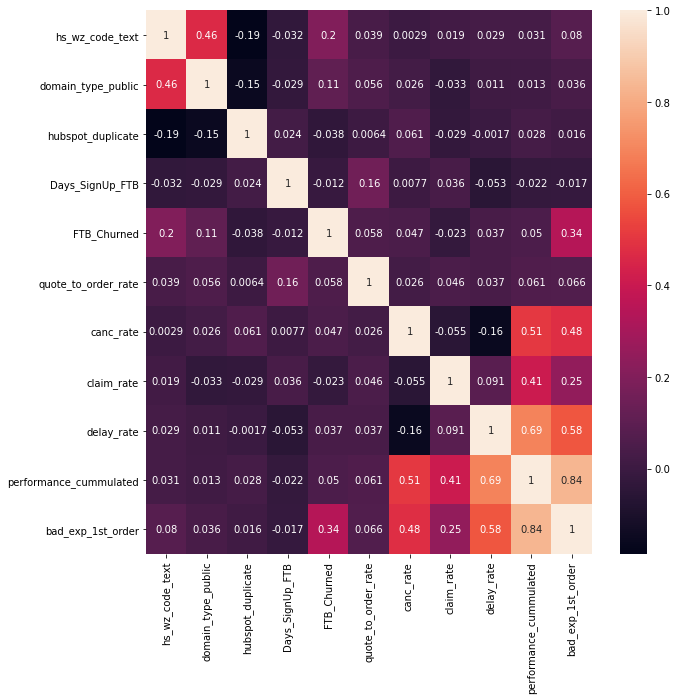

In [20]:
fig, ax = plt.subplots(figsize=(10,10))  
sns.heatmap(dataset1.corr(), annot=True)
plt.show()

When looking at the correlation matrix, a few correlations a worth mentioning: <br />
1.) Hs_wz_code_text and domain_type_public are strongly positive related, as registers with public domain often don't have a registered company. <br />
2.) Hs_wz_code_text and FTB_Churned are strongly negative correlated, i.e. "the farther away from top segment, the less likly a customer will return." <br />
3.) Hubspot_duplicate and domain_type_public are negatively correlated, because Hubspot automatically creates "Person accounts" for public domains. <br />
4.) domain_type_public and FTB_Churned are positively correlated, which could indicate that Private customers don't return. <br />
5.) Quote_to_order_rate and Days_SignUp_FTB are positive related, which makes sense, as people that take more time to place their order do more calculations.

#### 3.2.2 Treatment of outliers of numerical variables

In [21]:
#Removing outliers that are more than four standard deviations away
from scipy import stats
dataset1 = dataset1[(np.abs(stats.zscore(dataset1['quote_to_order_rate'])) < 4)]


In [22]:
print(len(dataset1.index))

8264


In [23]:
dataset1.describe()

,hs_wz_code_text,domain_type_public,hubspot_duplicate,Days_SignUp_FTB,FTB_Churned,quote_to_order_rate,canc_rate,claim_rate,delay_rate,performance_cummulated,bad_exp_1st_order
count,8264.000000,8264.000000,8264.000000,8264.000000,8264.000000,8264.000000,8264.000000,8264.000000,8264.000000,8264.000000,8264.000000
mean,2.234632,0.227977,0.138069,0.055353,0.390852,0.008554,0.107209,0.041146,0.174339,0.322694,0.170620
std,0.761061,0.419553,0.344993,0.116142,0.487971,0.011478,0.253206,0.146120,0.297032,0.392171,0.376199
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.002246,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,0.000000,0.000000,0.004759,0.000000,0.004865,0.000000,0.000000,0.000000,0.181818,0.000000
75%,3.000000,0.000000,0.000000,0.046401,1.000000,0.009918,0.050000,0.000000,0.250000,0.500000,0.000000
max,3.000000,1.000000,1.000000,1.000000,1.000000,0.103293,1.000000,1.000000,1.000000,2.000000,1.000000


#### 3.2.3 Data exploration of the Numerical Data

In [24]:
#Put the remaining numerical features into a list
numerical_features = [feature for feature in dataset1.columns if dataset1[feature].dtypes == 'float64']

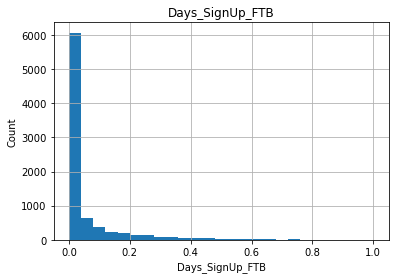

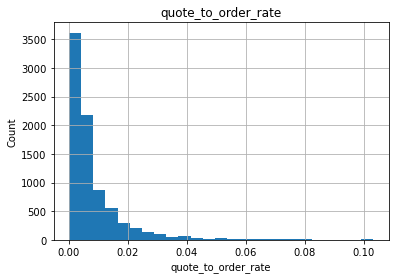

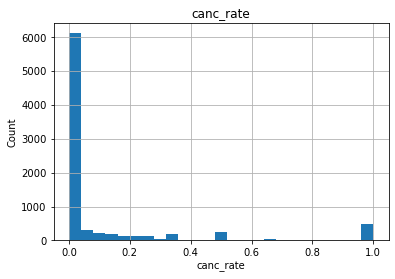

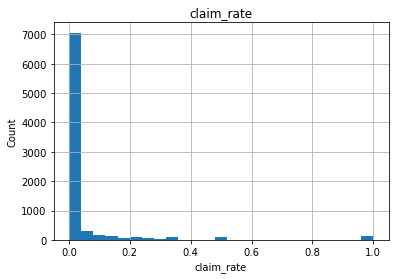

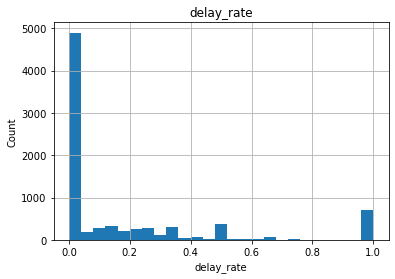

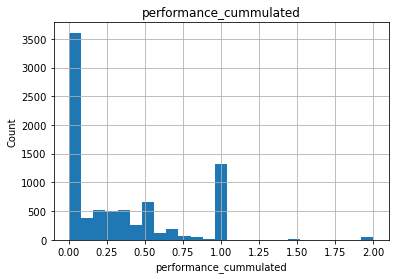

In [25]:
for feature in numerical_features:
    dataset1[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

With respect to the numerical data we can see that the data is always right skewed, which we would expect, as the majority of the customers don't have a claim, delay or a canceled order. <br />
An interesting segment are the FTBs that have a cancellation, claim or delay rate of 1, which esentially means that their first order wasn't processed as desired.
We will include a dummy variabele which returns "1" if one of the factors is true.

#### 3.2.4 Data exploration of categorical variables 

<AxesSubplot:xlabel='FTB_Churned', ylabel='count'>

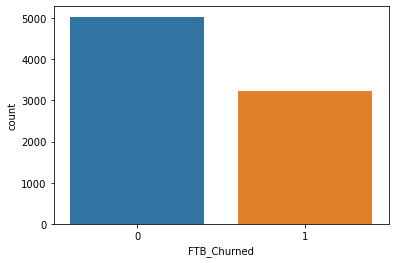

In [26]:
sns.countplot(x='FTB_Churned',data=dataset1, palette='tab10')


By looking at the graph we can see that more companies returned (roughly 60%) than actually churned (roughly 40%). <br />

<AxesSubplot:xlabel='FTB_Churned', ylabel='count'>

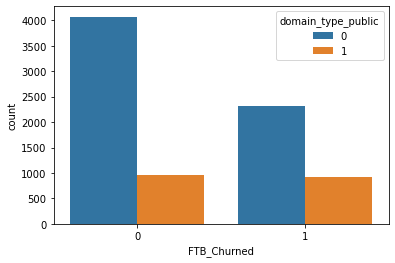

In [27]:
sns.countplot(x='FTB_Churned',data=dataset1,hue='domain_type_public',palette='tab10')


Customers with a public domain are almost twice as likely to churn, which is another indicator for the strong B2B focus of Laserbub. Consequently, Laserhub should continue its efforts regarding the acquisiton of B2B companies via fairs, in person events etc. where more "professional" buyers are present.

<AxesSubplot:xlabel='FTB_Churned', ylabel='count'>

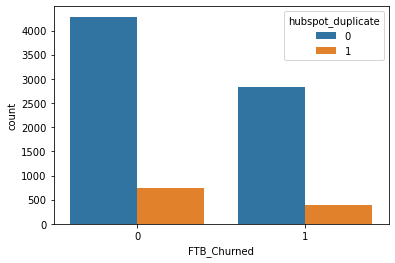

In [28]:
sns.countplot(x='FTB_Churned',data=dataset1,hue='hubspot_duplicate',palette='tab10')

As we see in the exploration of our numerical values, almost 14% of companies are considered by Hubspot (the Customer- Relationship-Management-System) to be duplicates (i.e. same domain).<br /> The probability that those duplicates are then considered to be churned, is slighlty higher.

<AxesSubplot:xlabel='FTB_Churned', ylabel='count'>

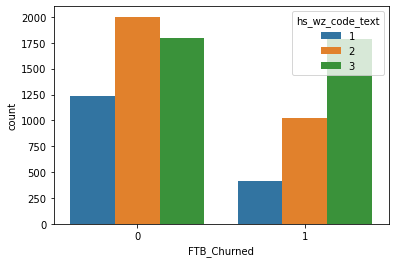

In [29]:
sns.countplot(x='FTB_Churned',data=dataset1,hue='hs_wz_code_text',palette='tab10')

Not surprisingly, we see that FTBs that are considered as "Top Segment" (25,28) churn much less likely. One reason could be the superior product-market fit for customers of those industries.

<AxesSubplot:xlabel='FTB_Churned', ylabel='count'>

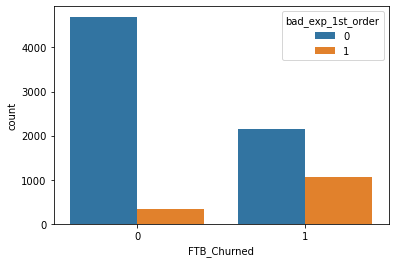

In [30]:
sns.countplot(x='FTB_Churned',data=dataset1,hue='bad_exp_1st_order',palette='tab10')


Another feature that - also not surprisingly - has a big impact on churn is the dummy "bad_exp_1st_order", which turns "1", if the sum of the canc_rate, claim_rate and delay_rate exceed one, i.e. if there were equal or more bad order experiences than "good" orders.

### 3.3 Modeling

Although a wide variety of classification algorithms would be suitable to predict the churn of first time buyers, the Logistic Regression was chosen in the first step, as the algorithm allows us to see which independent variables are  statistically significant and what their respective impact on the dependent variable is. The results can then be taken to derive suitable countermeasures.

Afterwards, in the evaluation step in chapter 4, we will check whether other classification algorithms would outperform our initial mode.

In [31]:
X = dataset1.drop('FTB_Churned',axis=1)
y = dataset1['FTB_Churned']

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
logmodel = LogisticRegression(solver='lbfgs', max_iter=1000)
logmodel.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [36]:
logmodel.score(X_train,y_train)

0.7776625172890733

In [37]:
logmodel.score(X_test,y_test)

0.7536290322580645

### 3.4 Model Evaluation

Within the Model Evaluation, first the overall performance of the Logistic Regression will be evaluated. Afterwards, the explanatory variables will be examined with respect to their statistical relevance. The evaluation concludes with the comparison of different classification algorithms.

3.4.1 Evaluation of the overall performance <br/>
3.4.2 Examination of the explanatory variables <br/>
3.4.3 Comparison of classification algorithms

#### 3.4.1 Evaluation of the overall performance

By looking at the score, we can see that the overall accuracy of the model is 77,2% for training and 76,5% for testing data. At this point it's yet to early to judge whether the predictions actually help us for the initial problem - identifying churning first-time buyers and implementing suitable countermeasures - as precision and recall are more decisive here.
The fact that the accuracy for training and testing data doesn't deviate to much let's us however conclude that we didn't overfit the model.

In [38]:
y_pred = logmodel.predict(X_test)

Text(0.5, 257.44, 'Predicted label')

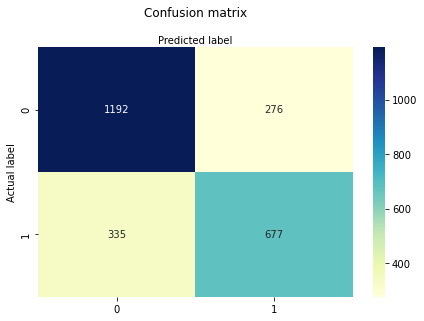

In [39]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Here, we can see the confusion matrix. Diagonal values represent accurate predictions, while non-diagonal elements are inaccurate predictions. In the output, 1240 and 666 are actual predictions, and 273 and 314 are incorrect predictions.

In [40]:
from sklearn.metrics import classification_report
target_names = ['No_churn', 'Churn']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

    No_churn       0.78      0.81      0.80      1468
       Churn       0.71      0.67      0.69      1012

    accuracy                           0.75      2480
   macro avg       0.75      0.74      0.74      2480
weighted avg       0.75      0.75      0.75      2480



As already indicated above, precision and recall are important metrics when evalualting the overall quality of a model. While the first one determines the proportion of positive identifications that was actually positive, the latter one determines the the proportion of actual positives that was identified correctly. 

When looking at the classification report, it becomes apparent that our model is better in predicting "No_churn" which can be partly due to the imbalanced dataset, where the class "No_churn" is dominant. 
Furthermore, Laserhub should carefully evaluate if and to what extend it wants to spend additional resources on customer loyality, as the precision of the class "Churn" is only 71% and some incentives therefore probably target the wrong customers. Despite facing this inaccuracy, one could conclude that the model yields some value, as current sales and marketing measures target all customers and require therefore even more capital.

In [41]:
logreg = LogisticRegression(max_iter=1000).fit(X_train,y_train)
logreg

print("Training set score: {:.3f}".format(logreg.score(X_train,y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test,y_test)))

import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Training set score: 0.778
Test set score: 0.754
Optimization terminated successfully.
         Current function value: 0.452954
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:            FTB_Churned   No. Observations:                 8264
Model:                          Logit   Df Residuals:                     8255
Method:                           MLE   Df Model:                            8
Date:                Thu, 24 Nov 2022   Pseudo R-squ.:                  0.3231
Time:                        08:00:50   Log-Likelihood:                -3743.2
converged:                       True   LL-Null:                       -5529.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
hs_wz_code_text            0.0720   

#### 3.4.3 Comparison of classification algorithms

In [42]:
# Compare Algorithms
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


In [43]:
seed = 7

In [44]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('RandForrest', RandomForestClassifier()))

LR: 0.772652 (0.050758)
LDA: 0.774830 (0.049860)
KNN: 0.809918 (0.045487)
CART: 0.850205 (0.026036)
NB: 0.678275 (0.067313)
SVM: 0.809793 (0.041809)
RandForrest: 0.841975 (0.027661)


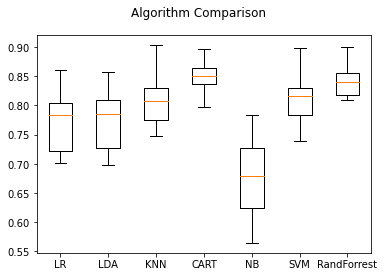

In [45]:
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10)
	cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

As can be seen from the comparison of the various classification algorithms, both the Decision Tree and Random Forrest appear to significantly outperform the chosen logistic regression. Due to the decision tree's tendency to overfit the data, a closer look at Random Forrest may prove particularly beneficial when we want to use the model for predictions of idividual customers in practice. 

## 4. Results and Conclusion

This seminar paper investigates whether a customer churn prediction model can be developed to help Laserhub identify the reasons for customer churn and then predict the probability of churn for individual customers. 

First, it has been shown that applying data exploration has helped us in identifying "hs_wz_code_text" as well as "bad_exp_1st_order" as two key drivers for first-time buyer churn. While the first variable can be used to sharpen the customer segment Laserhub should acquire, the latter one can be used to improve loyality measures if the first order wasn't processed as required by the customer.

Secondly, a classification model was build by applying logistic regression that was afterwards evaluated. Both the prediction accuracy of 77% and the robustness against new test data have to be emphasized positively. There is room for improvement in the metrics of precision and recall, so Laserhub GmbH should carefully consider whether additional resources should be spent on loyalty incentives.

Lastly, different classification algorithms were compared with respect to the overall accuracy. Especially Random Forrest seems to improve the classification accuracy significant which is why the analysis of the tree structure could be a beneficial area of further research. 

Since the machine learning models examined offer a novel approach to a previously unsolved problem - predicting the churn probability of individual customers - it can be concluded that their application in practice offers a clear advantage. The model developed and trained in this work could serve as a first starting point for further improvements. 

## References

Buckinx, W., Van der Poel, D. (2005). Customer base analysis: partial defection of
behaviourally loyal clients in a non-contractual FMCG retail setting. In: European journal
of operational research, Vol. 164(1), S. 252-268.

Jahromi, A.T., Stakhovych, S., Ewing, M. (2013). Managing B2 customer churn, retention,
and profitability. In: Industrial Marketing Management, Vol.47(7), S. 1258-1268.

Reichheld, F. (2001). Prescription for Cutting Costs. Loyal Relationships. Bain and
Company, Inc..

Sharma, A., Panigrahi, P. (2011). A Neural Network based Approach for Predicting
Customer Churn in Cellular Network Services. In: International Journal of Computer
Applications, Vol. 27(11), S. 26-31.